In [23]:
include("PVCR.jl");

# Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [2]:
consumption = 100:50:2500
pv = []
for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:0.1:15, BAC1, tariff_increase = true)
    push!(pv, res[1][2])
end

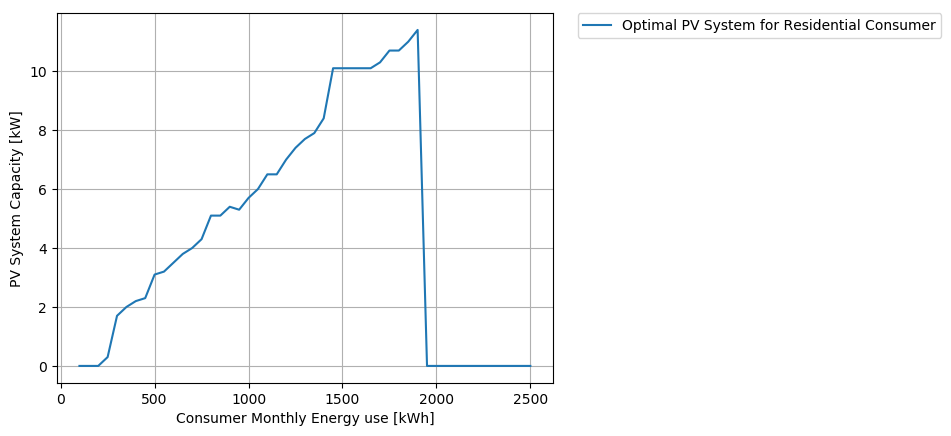

In [3]:
plot(consumption,pv, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

# Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [16]:
consumption1 = 500:50:3000
pv = []
for (ix, co) in enumerate(consumption1)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:0.1:20, BAC1, tariff_increase = true)
    push!(pv, res[1][2])
end

In [17]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:0.2:40, BAC1, tariff_increase = true)
    push!(pv, res[1][2])
end

In [18]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:0.5:100, BAC1, tariff_increase = true)
    push!(pv, res[1][2])
end

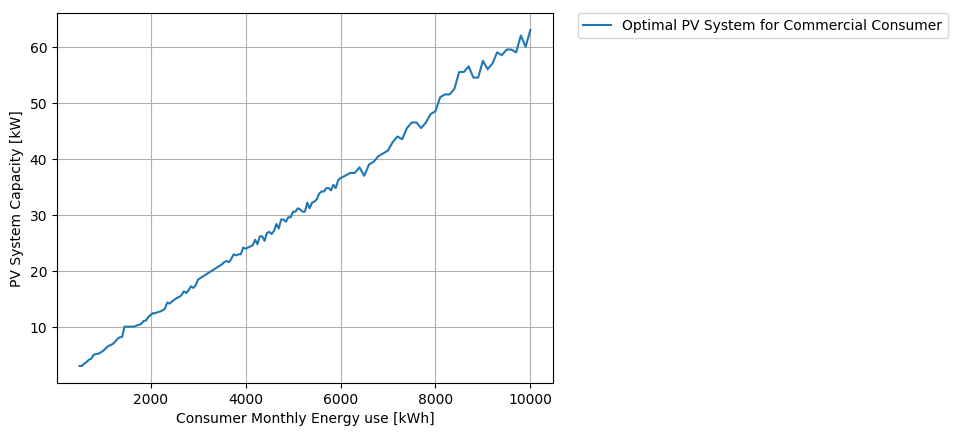

In [19]:
plot(vcat(consumption1, consumption2, consumption3),pv, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

# Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [32]:
consumption = 10000:10000:100000
pv = []
for (ix, co) in enumerate(consumption)
     mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv, res[1][2])
end

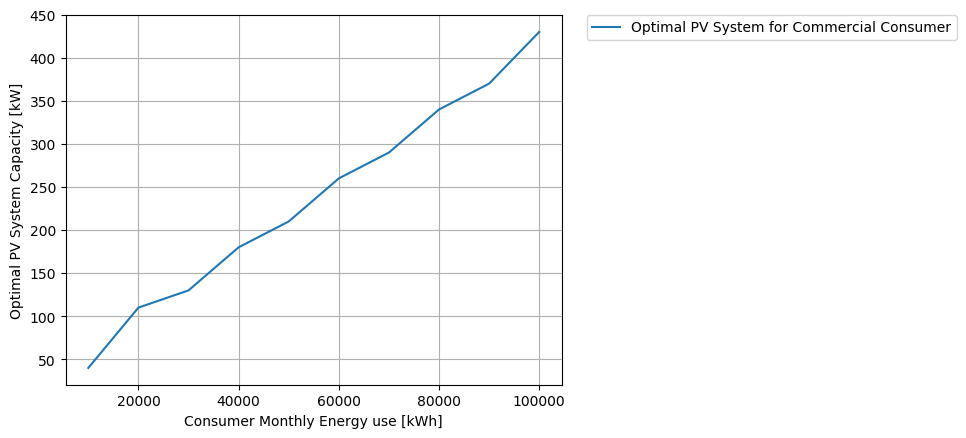

In [35]:
plot(consumption,pv, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");